# Fraud detection in credit card with predictive model
### johancaicedo6@gmail.com

<a id="s-0"></a>
## Contents.

* [**Project**](#s-1)
    - [Presentation](#s-10)
    - [Exploration](#s-11)
    - [Question 1](#s-12)
        -[Histograms](#s-121)
        -[Correlation](#s-122)
        -[Mean and median of the balance](#s-123)
    - [Question 2](#s-13)
        -[Table for customers last payment](#s-131)
    - [Question 3](#s-14)
        -[Machine learning](#s-141)
    - [Conclusions](#s-15)
    - [References](#s-16)

<a id="s-10"></a>
## Presentation

The aim of this project is construct a predective model to detect fraud in a database for credit card clients. For this, the project is divided in the following steps

* In the first part we done a exploration data and we detected the null values in data
* The next sections are divided to answer the next questions
** Question 1: 
*** Histograms of the differents variables for all the customers.
*** Report any structure you find and any hypotheses you have about that structure.
*** Report mean and median balance, grouped by year and month of `activated_date`.
** Question 2:
*** Report in a table the following information for customers who activated their account and
made their last payment during 2020: `cust_id` (excluding letters), `activated_date` (in format
YYYY-MM), `last_payment_date` (in format YYYY-MM-DD), `cash_advance`, `credit_limit`, and a
calculated field of `cash_advance` as a percentage of `credit_limit`.
** Question 3:
*** Build a predictive model for fraud.
*** What explanatory variable was the most powerful predictor for fraud?


0. Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.gridspec as gridspec 

1. Show database

In [2]:
data = pd.read_csv("~mac/Documents/Johan/Cursos python/Tests_Fraude/Stori_Data_Challenge_2021..csv")
data.head()

Unnamed: 0 cust_id activated_date last_payment_date      balance  \
0           1  C10001     2019-10-06        2020-09-09    40.900749   
1           2  C10002     2019-10-06        2020-07-04  3202.467416   
2           3  C10003     2019-10-06        2020-09-17  2495.148862   
3           4  C10004     2019-10-06        2020-08-24  1666.670542   
4           5  C10005     2019-10-06        2020-10-20   817.714335   

   balance_frequency  purchases  oneoff_purchases  installments_purchases  \
0           0.818182      95.40              0.00                    95.4   
1           0.909091       0.00              0.00                     0.0   
2           1.000000     773.17            773.17                     0.0   
3           0.636364    1499.00           1499.00                     0.0   
4           1.000000      16.00             16.00                     0.0   

   cash_advance  ...  purchases_installments_frequency  \
0      0.000000  ...                          0.083333   
1   6442.945483  ...                          0.000000   
2      0.000000  ...                          0.000000   
3    205.788017  ...                          0.000000   
4      0.000000  ...                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  fraud  
0   201.802084        139.509787          0.000000      12      0  
1  4103.032597       1072.340217          0.222222      12      0  
2   622.066742        627.284787          0.000000      12      0  
3     0.000000               NaN          0.000000      12      0  
4   678.334763        244.791237          0.000000      12      0  

[5 rows x 22 columns]

<a id="s-10"></a>
## Exploration data

Number of data rows and columns 

In [3]:
print('Rows: ', data.shape[0])
print('Columns: ', data.shape[1])

Rows:  8950
Columns:  22


Statistical interest values

In [4]:
data.describe().T

count         mean          std        min  \
Unnamed: 0                        8950.0  4475.500000  2583.786788   1.000000   
balance                           8948.0  1564.612804  2081.735635   0.000000   
balance_frequency                 8950.0     0.877271     0.236904   0.000000   
purchases                         8950.0  1003.204834  2136.634782   0.000000   
oneoff_purchases                  8950.0   592.437371  1659.887917   0.000000   
installments_purchases            8950.0   411.067645   904.338115   0.000000   
cash_advance                      8838.0   978.980630  2099.762588   0.000000   
purchases_frequency               8950.0     0.490351     0.401371   0.000000   
oneoff_purchases_frequency        8950.0     0.202458     0.298336   0.000000   
purchases_installments_frequency  8950.0     0.364437     0.397448   0.000000   
cash_advance_frequency            8950.0     0.135144     0.200121   0.000000   
cash_advance_trx                  8950.0     3.248827     6.824647   0.000000   
purchases_trx                     8950.0    14.709832    24.857649   0.000000   
credit_limit                      8949.0  4494.449450  3638.815725  50.000000   
payments                          8950.0  1733.143852  2895.063757   0.000000   
minimum_payments                  8629.0   864.173246  2373.455761   0.019163   
prc_full_payment                  8950.0     0.153715     0.292499   0.000000   
tenure                            8950.0    11.517318     1.338331   6.000000   
fraud                             8950.0     0.007821     0.088096   0.000000   

                                          25%          50%          75%  \
Unnamed: 0                        2238.250000  4475.500000  6712.750000   
balance                            128.234272   873.385231  2054.525476   
balance_frequency                    0.888889     1.000000     1.000000   
purchases                           39.635000   361.280000  1110.130000   
oneoff_purchases                     0.000000    38.000000   577.405000   
installments_purchases               0.000000    89.000000   468.637500   
cash_advance                         0.000000     0.000000  1115.395002   
purchases_frequency                  0.083333     0.500000     0.916667   
oneoff_purchases_frequency           0.000000     0.083333     0.300000   
purchases_installments_frequency     0.000000     0.166667     0.750000   
cash_advance_frequency               0.000000     0.000000     0.222222   
cash_advance_trx                     0.000000     0.000000     4.000000   
purchases_trx                        1.000000     7.000000    17.000000   
credit_limit                      1600.000000  3000.000000  6500.000000   
payments                           383.276166   856.901546  1901.134317   
minimum_payments                   169.079690   311.963409   825.271126   
prc_full_payment                     0.000000     0.000000     0.142857   
tenure                              12.000000    12.000000    12.000000   
fraud                                0.000000     0.000000     0.000000   

                                          max  
Unnamed: 0                         8950.00000  
balance                           19043.13856  
balance_frequency                     1.00000  
purchases                         49039.57000  
oneoff_purchases                  40761.25000  
installments_purchases            22500.00000  
cash_advance                      47137.21176  
purchases_frequency                   1.00000  
oneoff_purchases_frequency            1.00000  
purchases_installments_frequency      1.00000  
cash_advance_frequency                1.50000  
cash_advance_trx                    123.00000  
purchases_trx                       358.00000  
credit_limit                      30000.00000  
payments                          50721.48336  
minimum_payments                  76406.20752  
prc_full_payment                      1.00000  
tenure                               12.00000  
f

Amount of null values

In [5]:
print('Number of null data: ', data.isnull().sum().max())

Number of null data:  321


Non-null data for each column

In [6]:
print(data.isna().sum())

Unnamed: 0                            0
cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64


Lest look for null data in `minimum_payments` and `cash_advance` that are the variables with more null values

In [7]:
data[data.minimum_payments.isna()]

Unnamed: 0 cust_id activated_date last_payment_date      balance  \
3              4  C10004     2019-10-06        2020-08-24  1666.670542   
45            46  C10047     2019-10-07        2020-08-27  2242.311686   
47            48  C10049     2019-10-07        2020-07-07  3910.111237   
54            55  C10056     2019-10-07        2020-07-30     6.660517   
55            56  C10057     2019-10-07        2020-09-23  1311.995984   
...          ...     ...            ...               ...          ...   
8919        8920  C19160     2020-07-30        2020-08-11    14.524779   
8929        8930  C19170     2020-07-31        2020-08-23   371.527312   
8935        8936  C19176     2020-07-31        2020-06-05   183.817004   
8944        8945  C19185     2020-07-31        2020-10-06   193.571722   
8946        8947  C19187     2020-07-31        2020-09-06    19.183215   

      balance_frequency  purchases  oneoff_purchases  installments_purchases  \
3              0.636364    1499.00           1499.00                     0.0   
45             1.000000     437.00             97.00                   340.0   
47             1.000000       0.00              0.00                     0.0   
54             0.636364     310.00              0.00                   310.0   
55             1.000000    1283.90           1283.90                     0.0   
...                 ...        ...               ...                     ...   
8919           0.333333     152.00            152.00                     0.0   
8929           0.333333       0.00              0.00                     0.0   
8935           1.000000     465.90              0.00                   465.9   
8944           0.833333    1012.73           1012.73                     0.0   
8946           1.000000     300.00              0.00                   300.0   

      cash_advance  ...  purchases_installments_frequency  \
3       205.788017  ...                          0.000000   
45      184.648692  ...                          0.333333   
47     1980.873201  ...                          0.000000   
54        0.000000  ...                          0.666667   
55        0.000000  ...                          0.000000   
...            ...  ...                               ...   
8919      0.000000  ...                          0.000000   
8929   1465.407927  ...                          0.000000   
8935      0.000000  ...                          0.833333   
8944           NaN  ...                          0.000000   
8946      0.000000  ...                          0.833333   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        payments  minimum_payments  prc_full_payment  tenure  fraud  
3       0.000000               NaN               0.0      12      0  
45      0.000000               NaN               0.0      12      0  
47      0.000000               NaN               0.0      12      0  
54    417.016763               NaN               0.0      12      0  
55      0.000000               NaN               0.0      12      0  
...          ...               ...               ...  

In [8]:
data[data.cash_advance.isna()]

Unnamed: 0 cust_id activated_date last_payment_date      balance  \
8              9  C10009     2019-10-06        2020-10-06  1014.926473   
48            49  C10050     2019-10-07        2020-06-16   229.867179   
89            90  C10094     2019-10-08        2020-07-21  6110.265264   
123          124  C10128     2019-10-09        2020-07-16  2876.396444   
178          179  C10184     2019-10-11        2020-10-06   336.799916   
...          ...     ...            ...               ...          ...   
8673        8674  C18910     2020-07-22        2020-10-22    39.564588   
8680        8681  C18917     2020-07-22        2020-08-17  1314.832328   
8802        8803  C19042     2020-07-27        2020-05-01   427.905890   
8938        8939  C19179     2020-07-31        2020-06-14    78.818407   
8944        8945  C19185     2020-07-31        2020-10-06   193.571722   

      balance_frequency  purchases  oneoff_purchases  installments_purchases  \
8              1.000000     861.49            661.49                  200.00   
48             1.000000    2390.60           1402.93                  987.67   
89             1.000000       0.00              0.00                    0.00   
123            1.000000       0.00              0.00                    0.00   
178            1.000000    3535.80           1614.70                 1921.10   
...                 ...        ...               ...                     ...   
8673           0.363636     359.24              0.00                  359.24   
8680           0.909091       0.00              0.00                    0.00   
8802           0.900000       0.00              0.00                    0.00   
8938           0.500000       0.00              0.00                    0.00   
8944           0.833333    1012.73           1012.73                    0.00   

      cash_advance  ...  purchases_installments_frequency  \
8              NaN  ...                          0.250000   
48             NaN  ...                          1.000000   
89             NaN  ...                          0.000000   
123            NaN  ...                          0.000000   
178            NaN  ...                          0.916667   
...            ...  ...                               ...   
8673           NaN  ...                          0.333333   
8680           NaN  ...                          0.000000   
8802           NaN  ...                          0.000000   
8938           NaN  ...                          0.000000   
8944           NaN  ...                          0.000000   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
8                   0.000000                 0              5        7000.0   
48                  0.000000                 0             87        3300.0   
89                  0.416667                14              0        6500.0   
123                 0.166667                 2              0        3200.0   
178                 0.000000                 0             44       20000.0   
...                      ...               ...            ...           ...   
8673                0.000000                 0              4        1500.0   
8680                0.166667                 4              0        1500.0   
8802                0.300000                 6              0        1200.0   
8938                0.166667                 7              0        1200.0   
8944                0.000000                 0              2        4000.0   

         payments  minimum_payments  prc_full_payment  tenure  fraud  
8      688.278568        311.963409          0.000000      12      0  
48    2543.953559        175.657825          0.916667      12      0  
89    1502.205631       2864.380327          0.000000      12      0  
123   1065.426905       1412.648089          0.000000      12      0  
178   2814.231227        186.230835          1.000000      12      0  
...           ...               ...             

<a id="s-12"></a>
## Question 1.

<a id="s-121"></a>
Lest create the histograms for each variable except `cust_id`, we have created a new database without that variable and then we have ploted all histograms.

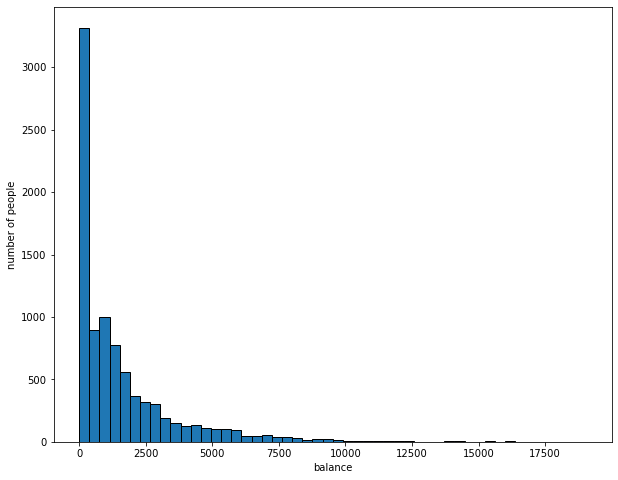

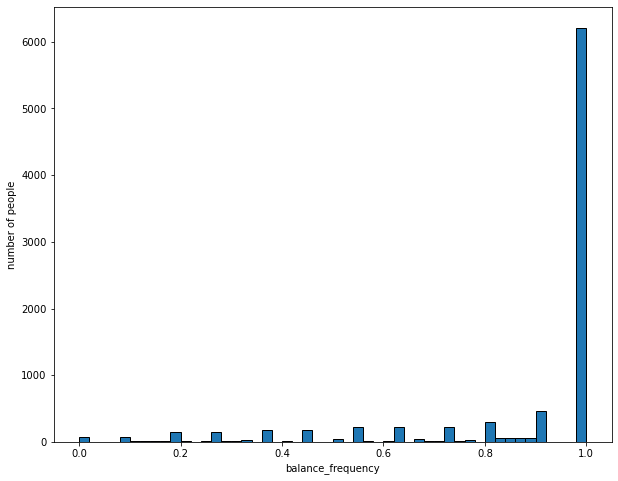

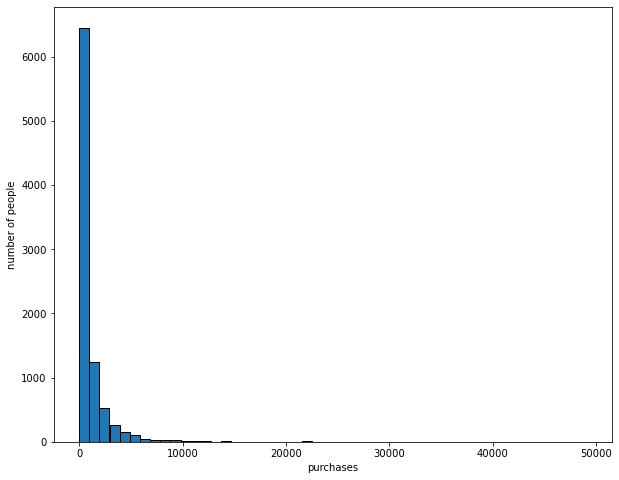

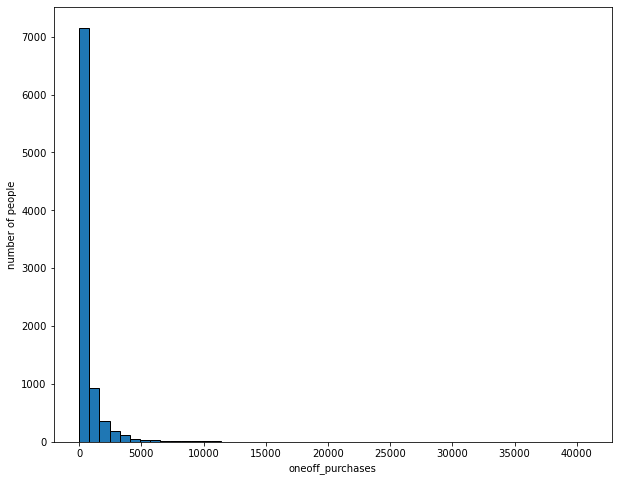

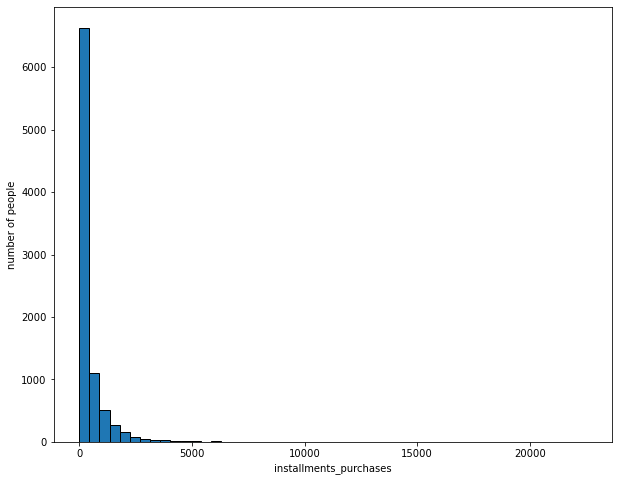

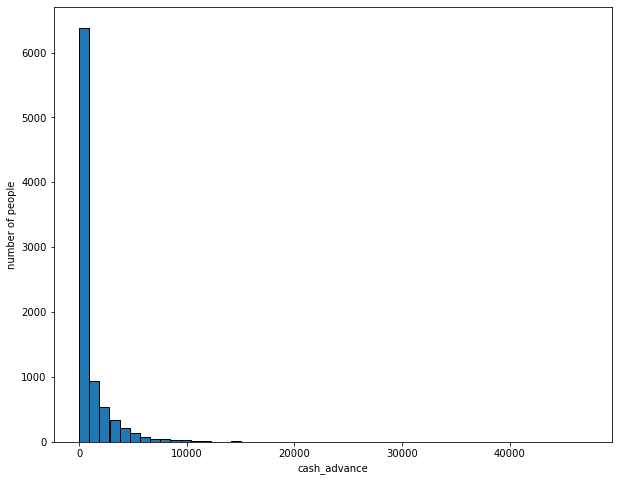

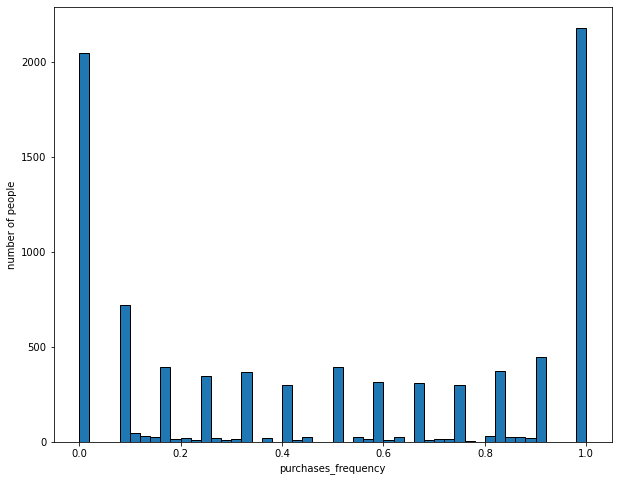

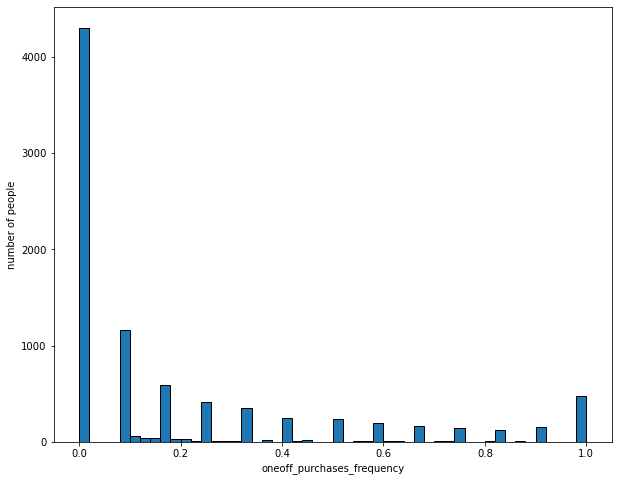

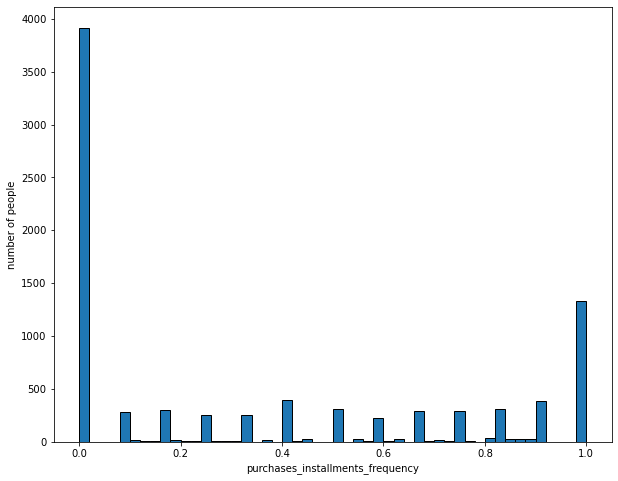

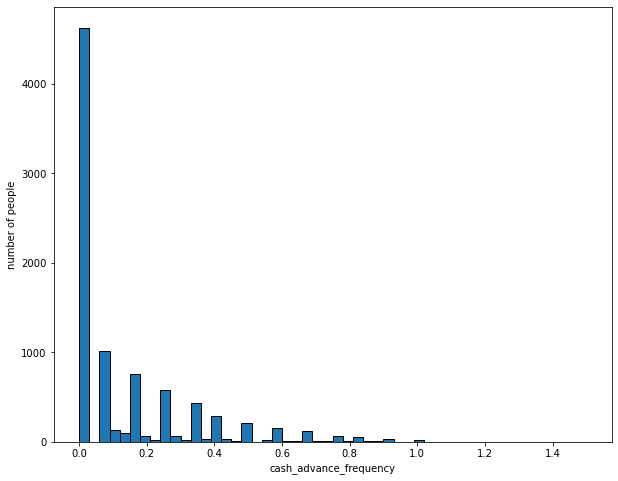

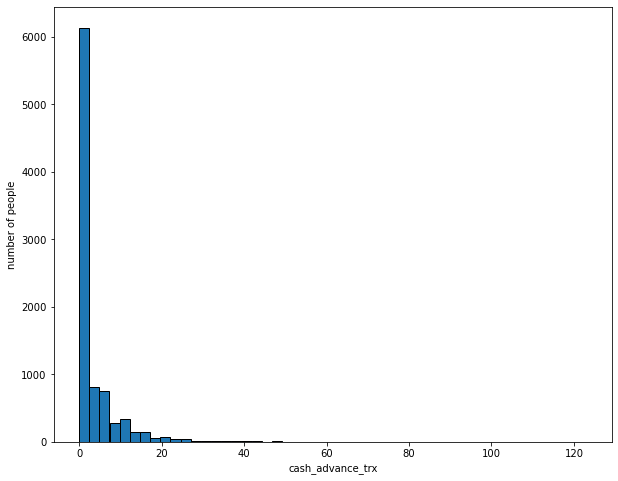

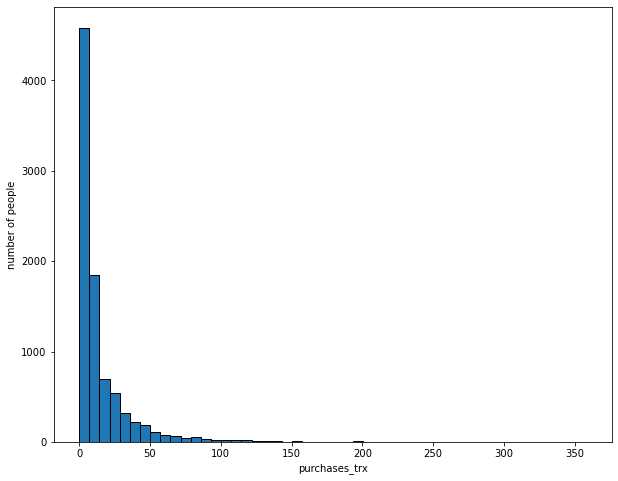

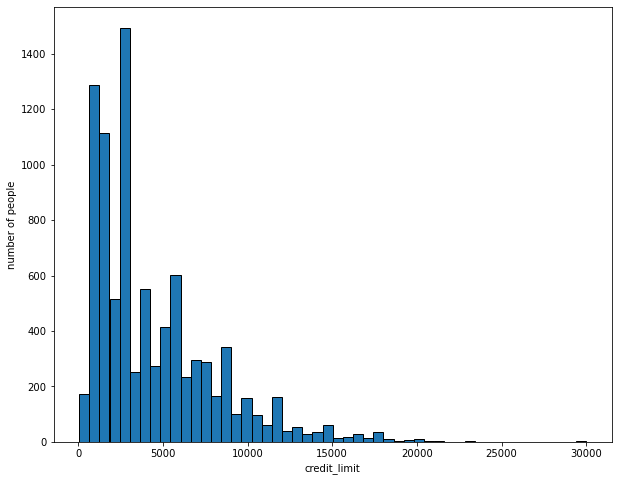

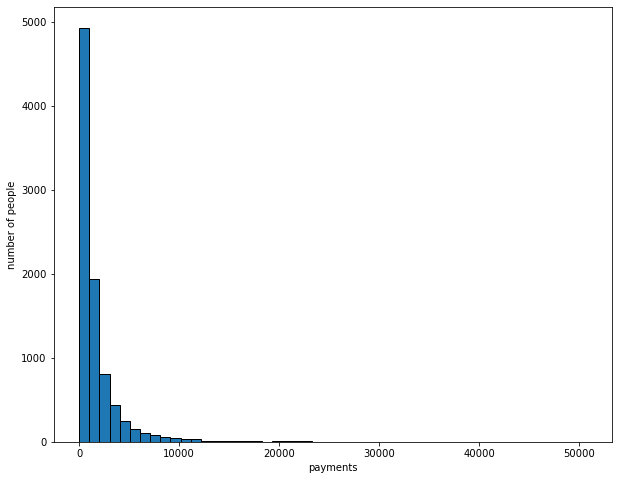

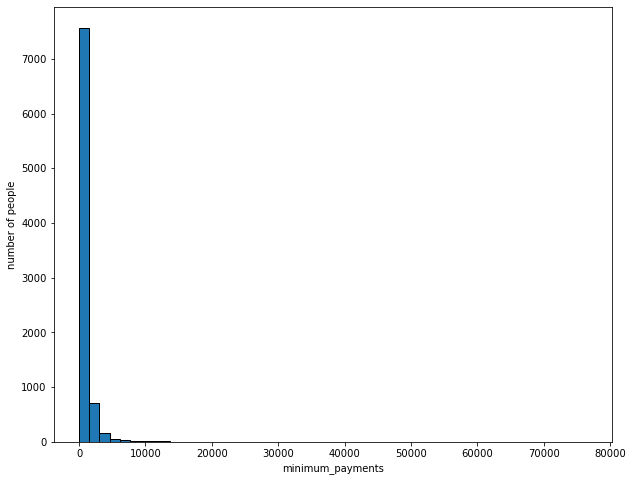

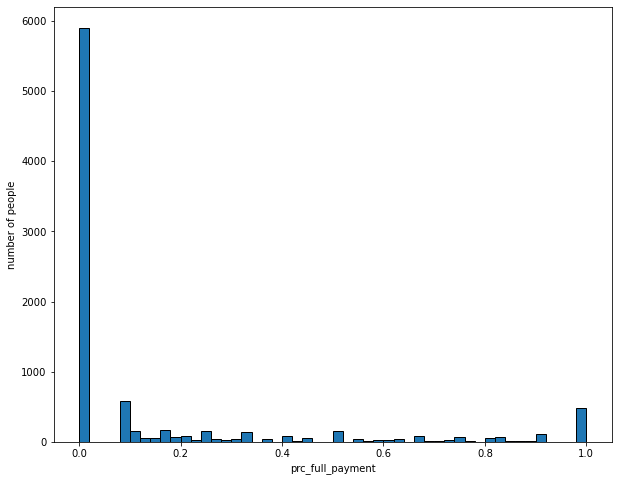

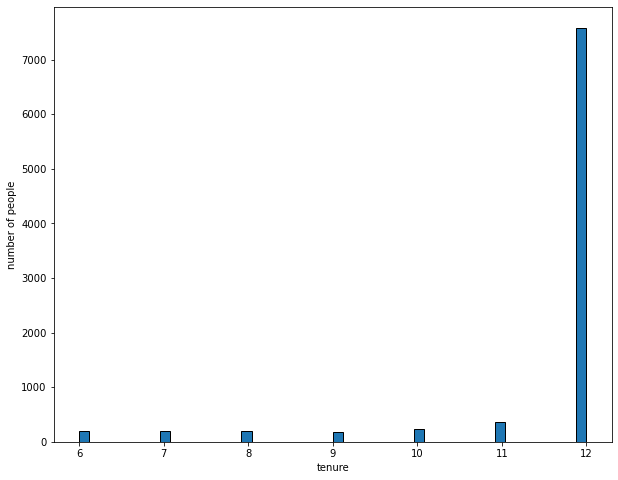

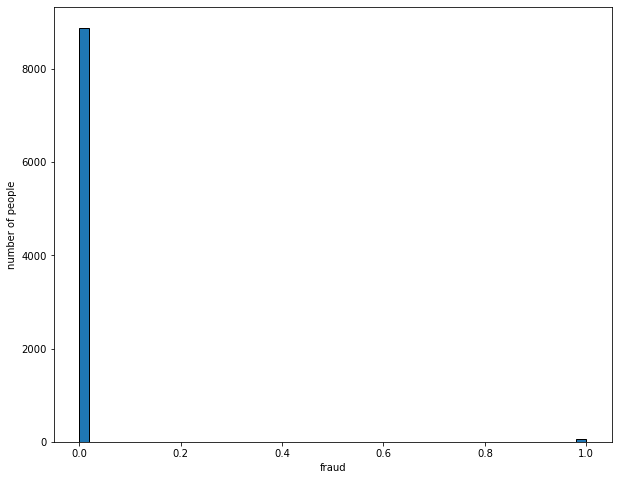

In [9]:
data_new = data.copy()
data_new.drop(columns=['Unnamed: 0', 'cust_id', 'activated_date','last_payment_date'] , axis=1 , inplace=True)

for i in data_new:
    plt.figure(figsize=[10,8])
    plt.hist(data_new[i], bins=50, edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

<a id="s-122"></a>
Make a correlation heatmap

<Figure size 720x480 with 0 Axes>

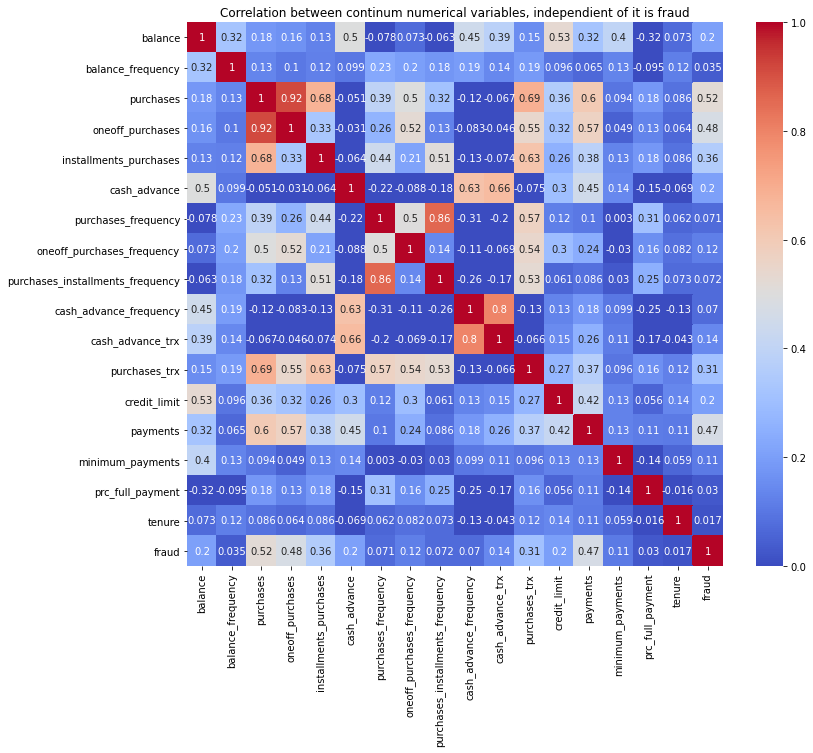

In [10]:
plt.figure(dpi=120)
plt.figure(figsize=(12,10))
plt.title('Correlation between continum numerical variables, independient of it is fraud')
cols = [
    'balance',
       'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'fraud'
]

sns.heatmap(data[cols].corr(), annot=True, cmap='coolwarm', vmin=0);ze=(15,8)


The heatmap above indicates the correlation between each variable. We are interested specially in the correlation of each variable and the variable `fraud`, and we can see that ones with higher value are `purchasee` (with 0,52) and `oneoff_purchase` (with 0,48), for positive values.

In this step, we can see that for `fraud` variable which variables are most relevant for the future predictive method to detect fraud. This could be "purchases", in this opportunity using a visual or cualitative method, bellow we are going to use another method to valid this. Therefore, one initial hypotesis would be that these variables are the most important for the test to find any fraud in the predictive method.

<a id="s-123"></a>
The next is report mean and median balance, grouped by year and month of activated_date.

In [11]:
# Hide the "Unnamed" column, because is irrelevat for our analysis

data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
# Cretate a new dataframe, activate the formats requerid and add the mean and median
data.activated_date = pd.to_datetime(data.activated_date, format='%Y-%m-%d').dt.strftime('%Y-%m')
cols = ['activated_date']
agg = {'balance': ['median', 'mean']}
data_agrupada = data.groupby(cols).agg(agg)

In [13]:
# Without index
data_agrupada.reset_index(inplace=True)

In [14]:
data_agrupada

activated_date      balance             
                       median         mean
0        2019-10  1524.409377  2482.234166
1        2019-11  1082.071173  1848.704323
2        2019-12  1162.588384  2018.788906
3        2020-01  1175.749847  1854.535889
4        2020-02   994.841733  1747.350977
5        2020-03   828.954823  1554.973023
6        2020-04   910.141912  1483.183191
7        2020-05   734.557681  1214.333732
8        2020-06   472.791862   939.997996
9        2020-07   221.291290   649.717622

<a id="s-13"></a>
## Question 2

<a id="s-131"></a>
In this step we will report in a table the customers information who activated their counts and mades their last payments during 2020

In [15]:
# construct the required conditions
cond1 = data.last_payment_date >= '2020-01-01'
cond2 = data.last_payment_date <= '2020-12-31'

data_ = data[cond1 & cond2]

In [16]:
#eliminate the initial letter character in the variable "cust_id"
data_.cust_id = data_.cust_id.apply(lambda x: x[1:])

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
# Select the variables of interest
cols =['cust_id', 'activated_date', 'last_payment_date',
       'cash_advance', 'credit_limit']
data_ =data_[cols]

In [18]:
data_

cust_id activated_date last_payment_date  cash_advance  credit_limit
0      10001        2019-10        2020-09-09      0.000000        1000.0
1      10002        2019-10        2020-07-04   6442.945483        7000.0
2      10003        2019-10        2020-09-17      0.000000        7500.0
3      10004        2019-10        2020-08-24    205.788017        7500.0
4      10005        2019-10        2020-10-20      0.000000        1200.0
...      ...            ...               ...           ...           ...
8945   19186        2020-07        2020-11-03      0.000000        1000.0
8946   19187        2020-07        2020-09-06      0.000000        1000.0
8947   19188        2020-07        2020-06-03      0.000000        1000.0
8948   19189        2020-07        2020-07-19     36.558778         500.0
8949   19190        2020-07        2020-10-14    127.040008        1200.0

[8941 rows x 5 columns]

In [19]:
# Add the percent column with 3 significative ciphers
data_['average_cash_avance(%)'] = round(data_['cash_advance'] / data_['credit_limit'] * 100, 3)
data_

cust_id activated_date last_payment_date  cash_advance  credit_limit  \
0      10001        2019-10        2020-09-09      0.000000        1000.0   
1      10002        2019-10        2020-07-04   6442.945483        7000.0   
2      10003        2019-10        2020-09-17      0.000000        7500.0   
3      10004        2019-10        2020-08-24    205.788017        7500.0   
4      10005        2019-10        2020-10-20      0.000000        1200.0   
...      ...            ...               ...           ...           ...   
8945   19186        2020-07        2020-11-03      0.000000        1000.0   
8946   19187        2020-07        2020-09-06      0.000000        1000.0   
8947   19188        2020-07        2020-06-03      0.000000        1000.0   
8948   19189        2020-07        2020-07-19     36.558778         500.0   
8949   19190        2020-07        2020-10-14    127.040008        1200.0   

      average_cash_avance(%)  
0                      0.000  
1                     92.042  
2                      0.000  
3                      2.744  
4                      0.000  
...                      ...  
8945                   0.000  
8946                   0.000  
8947                   0.000  
8948                   7.312  
8949                  10.587  

[8941 rows x 6 columns]

<a id="s-14"></a>
## Question 3

Lets to construct the predective model, the first step is eliminate all null values, for this we look the aparent relationship between the registers and its nullity

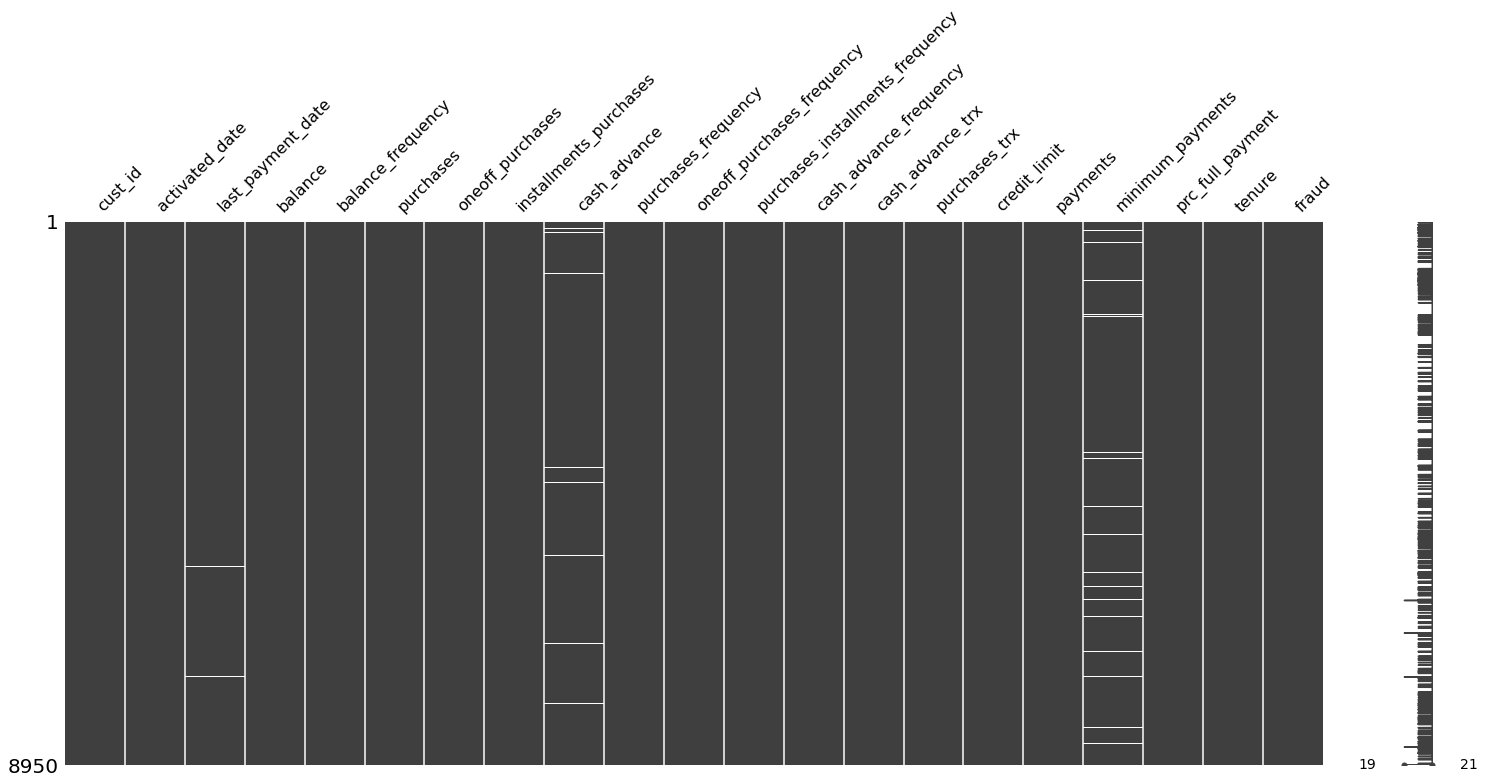

In [20]:
import missingno as msno
msno.matrix(data);

There is no relationship between registers and its nullity. In first approximation we eliminate these. Giving a bussines logic, a "nan" value in the columns `cash-advance` or `minimun payment` could be a non payment by the customer and his payment is zero. 

In [21]:
data.dropna(inplace=True)

In [22]:
data.duplicated().sum()

0

In [23]:
print(data.isna().sum())

cust_id                             0
activated_date                      0
last_payment_date                   0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
fraud                               0
dtype: int64


Now we see that there is no null values in data

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

<Figure size 720x480 with 0 Axes>

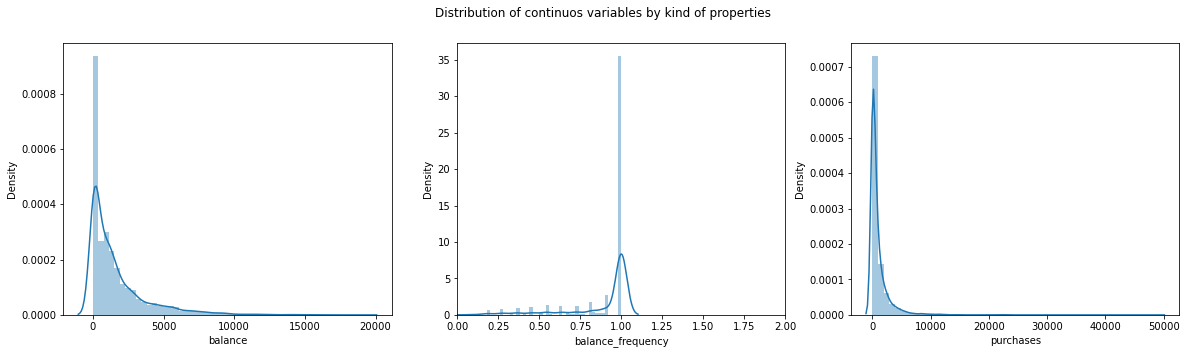

In [24]:
# distribution of continuos varables
plt.figure(dpi=120);
fig, axes = plt.subplots(1, 3, figsize=(20,5));
fig.suptitle('Distribution of continuos variables by kind of properties');
sns.distplot(data['balance'],kde=True,  label= 'balancel',ax=axes[0]);
#axes[0].set_xlim(0,600)
sns.distplot(data['balance_frequency'],kde=True, label= 'balance_frequency',ax=axes[1]);
axes[1].set_xlim(0,2)
sns.distplot(data['purchases'],kde=True, label= 'purchases',ax=axes[2]);
plt.tight_layout;

In [25]:
# kind of content of fraud variable

data.fraud.unique()

array([0, 1])

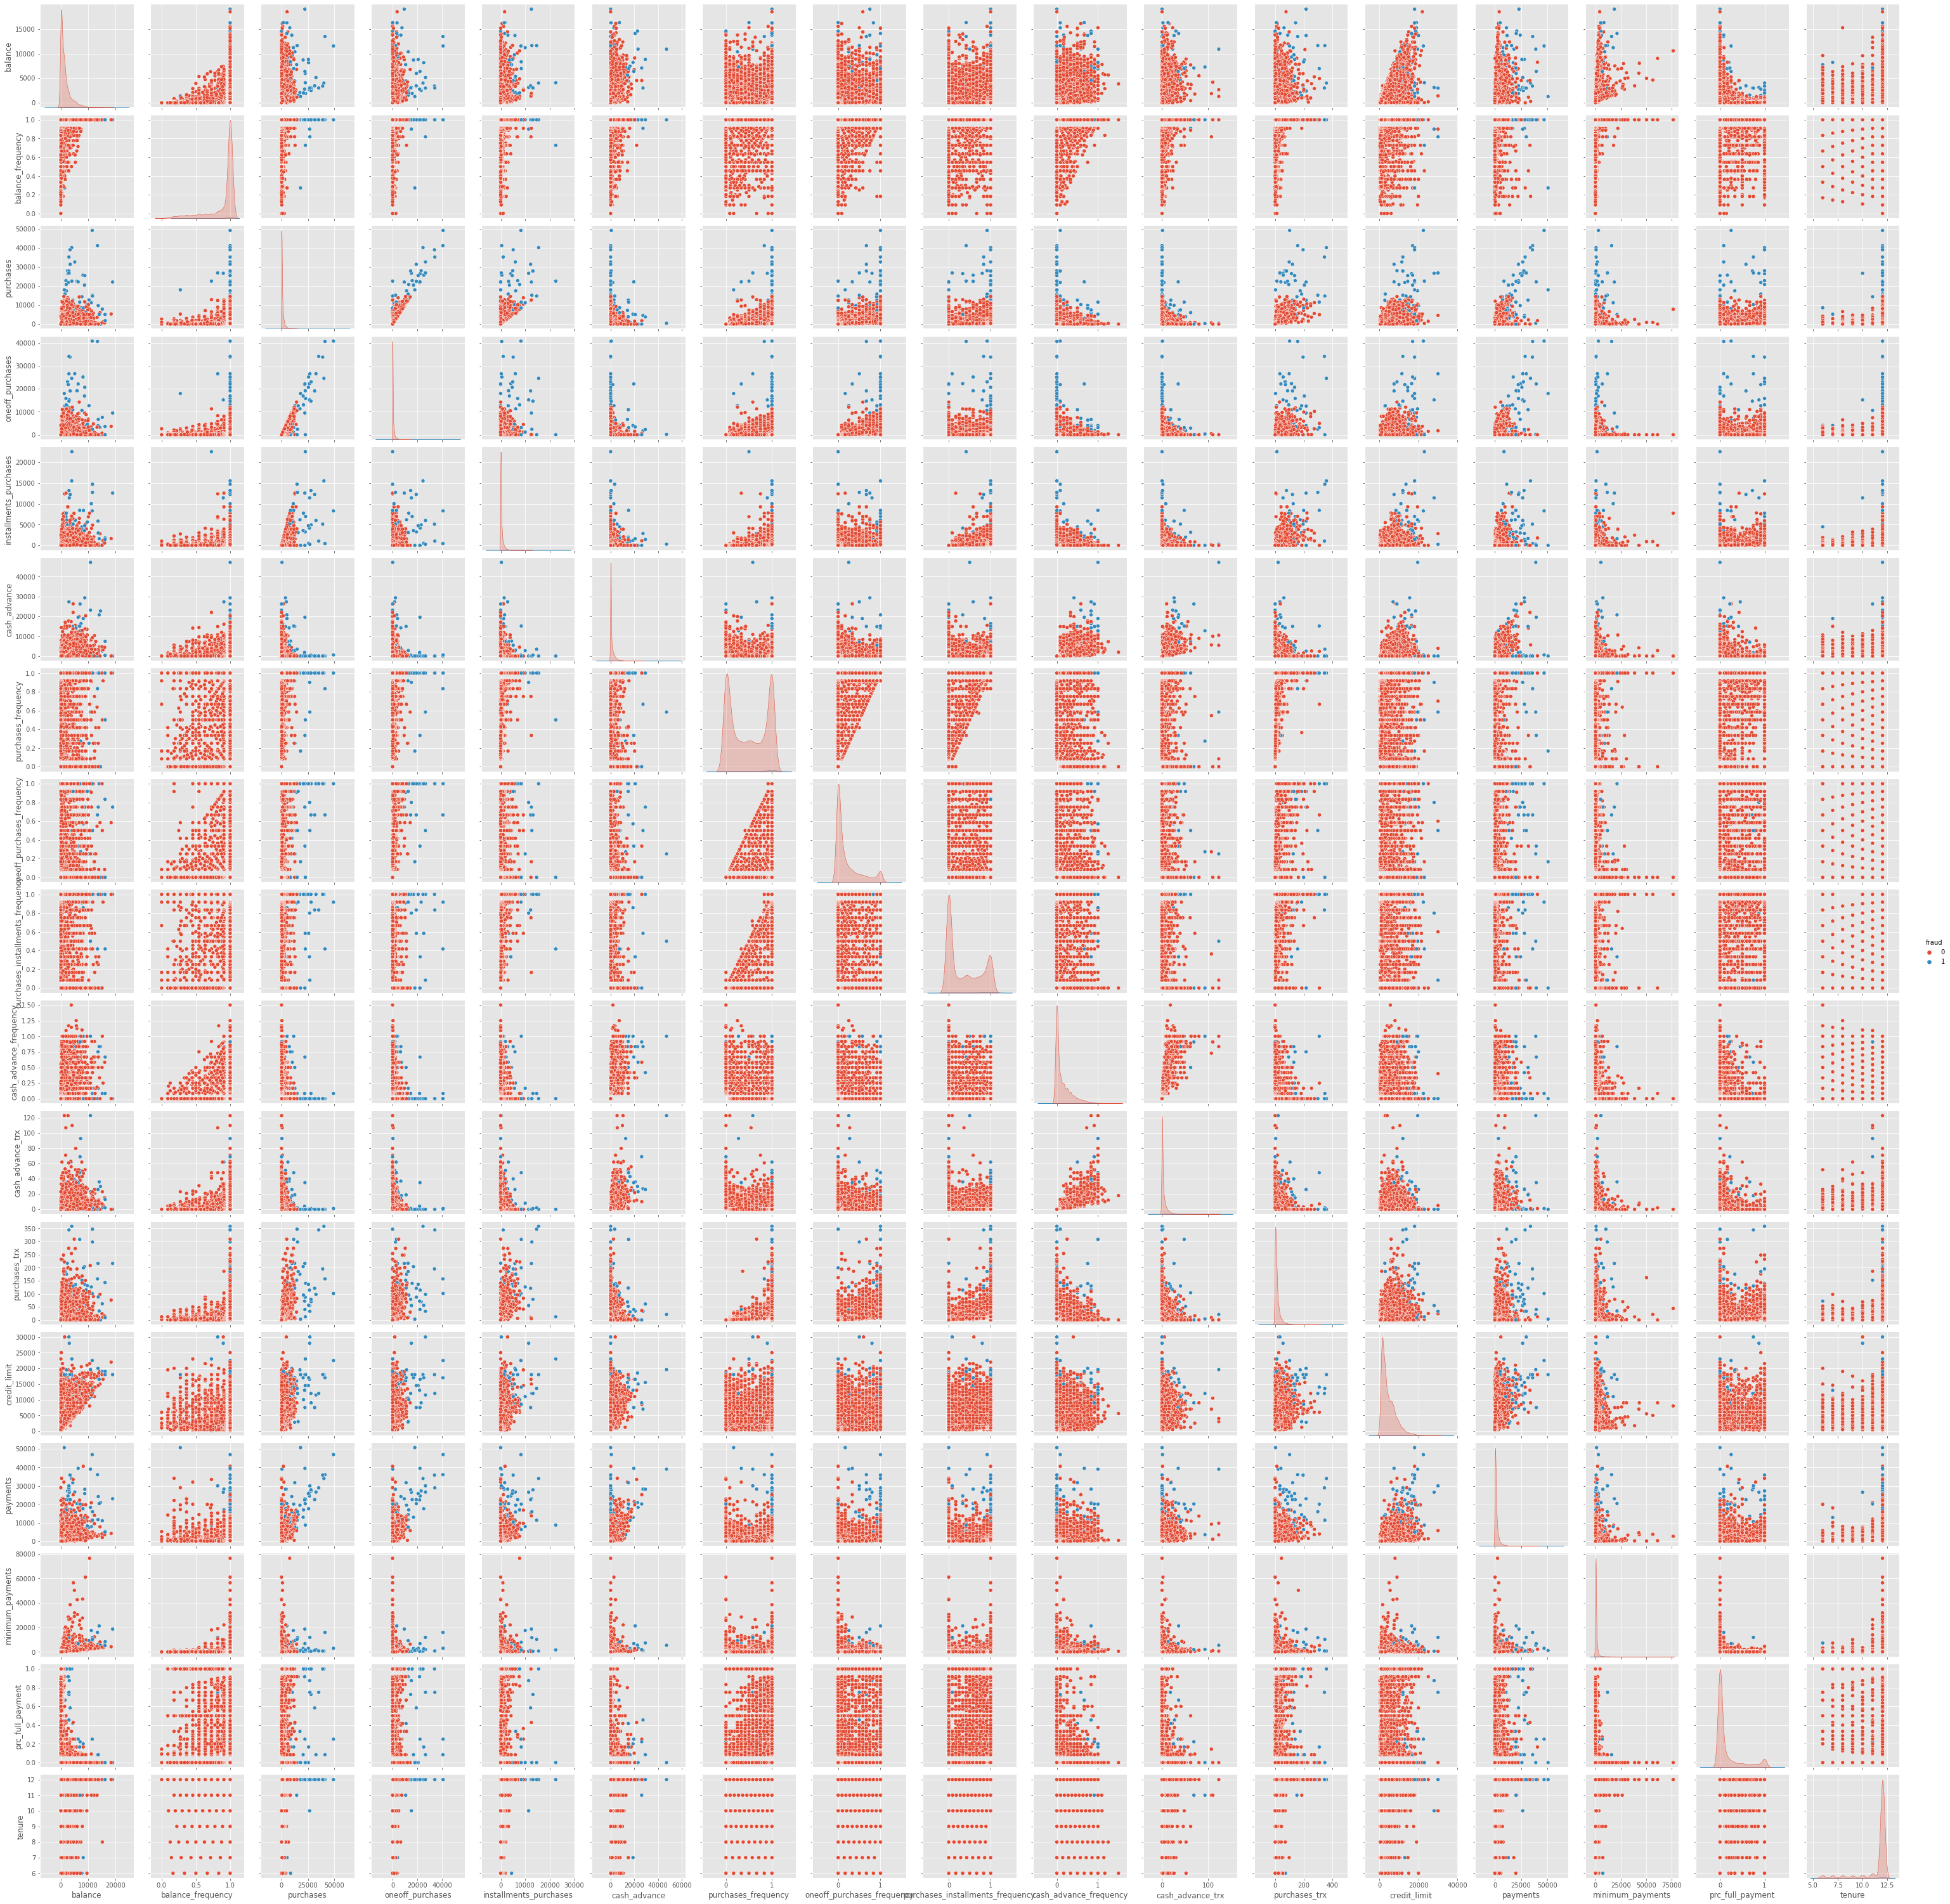

In [41]:
# Pairplot to show plots against each variable and its possible correlation
sns.pairplot(data, hue = 'fraud')

<a id="s-141"></a>
Transformation: Standard Scales  and OneHotEncoder (for categorical variables and convert to "dummy" variables)

In [27]:
# Function to preprocess data 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector 

def prepocesar(X):
        
        '''Numeric columns are standardized and qualitative columns are one-hot-encoded. 
        To keep the columns to which no transformation is applied, you must indicate 
        remainder = 'passthrough '.'''
        
        numeric_cols = X.select_dtypes(include=['float64', 'int']).columns.to_list()
        cat_cols = X.select_dtypes(include=['object', 'category']).columns.to_list()
        preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False), cat_cols)],
                remainder='passthrough')

        X_prep = preprocessor.fit_transform(X)
        # Convertir el output en dataframe y añadir el nombre de las columnas
        encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
        labels = np.concatenate([numeric_cols, encoded_cat])
        datos_prep = pd.DataFrame(X_prep, columns=labels)
        return datos_prep

In [28]:
data.columns

Index(['cust_id', 'activated_date', 'last_payment_date', 'balance',
       'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'fraud'],
      dtype='object')

In [29]:
# We are not inretest in consider this columns, and fraud would be redundant
X = data.drop(['cust_id', 'activated_date', 'last_payment_date', 'fraud'], axis=1)
y = data['fraud']

In [30]:
# Divide and train the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [31]:
from sklearn.tree import DecisionTreeClassifier


# Integers numbers of 1 to 50 
max_depth_values = np.arange(1, 51, 1)

# Empty array to storage the training and generalization error 

train_error = np.empty(len(max_depth_values))
generalization_error = np.empty(len(max_depth_values))


for depth in max_depth_values:
    # We train
    decision_tree = DecisionTreeClassifier(max_depth = depth)
    decision_tree.fit(X_train, y_train)
    train_error[depth - 1] = (1 - decision_tree.score(X_train, y_train))
    generalization_error[depth - 1] = (1 - decision_tree.score(X_test, y_test))

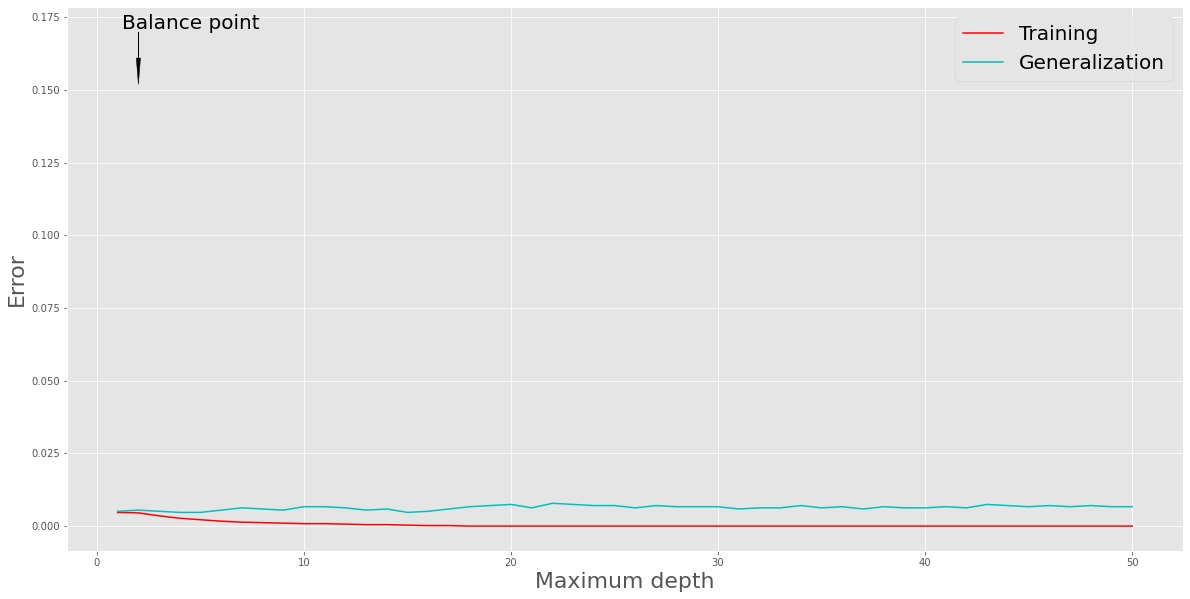

In [32]:
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(max_depth_values, train_error, label="Training", c='r')
plt.plot(max_depth_values, generalization_error, label="Generalization",c='c')
#plt.xticks(max_depth_values)
plt.xlabel("Maximum depth",fontsize=22); 
plt.ylabel("Error",fontsize=22);
plt.arrow(2, 0.17, 0, -0.009, head_width=0.2, head_length=0.009, fc='k', ec='k')
plt.text(1.2, 0.171, 'Balance point',fontsize=20)

plt.legend(fontsize=20);

In [33]:
# Model cration

modelo = DecisionTreeClassifier(
            max_depth         = 2,
            criterion         = 'gini',
            random_state      = 2021
          )

# Training of the model

modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2021)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Test Error

predicciones = modelo.predict(X = X_test)

print("Confusion Matrix")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

Confusion Matrix
-------------------


array([[2532,    0],
       [  13,    5]])

The confusion matrix tells us how much the model is 'confused' in the training, we infer this from the elements outside the diagonal or elements of mixture.

In [35]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"The accuracy of test is: {np.round(100 * accuracy,1)} %")

The accuracy of test is: 99.5 %


This model could predict correctly a 99.5 % of the observations in the test set.

Then we look for the importance of the predictors in the model

In [36]:
# Model Coefficients


print("Importance of the predictors in the model")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor':X.columns,#'predictor': labels.tolist(),
                             'importance': modelo.feature_importances_}
                            )
importancia_predictores.sort_values('importance', ascending=False)

Importance of the predictors in the model
-------------------------------------------


predictor  importance
2                          purchases    0.823480
5                       cash_advance    0.140227
14                  minimum_payments    0.036293
0                            balance    0.000000
10                  cash_advance_trx    0.000000
15                  prc_full_payment    0.000000
13                          payments    0.000000
12                      credit_limit    0.000000
11                     purchases_trx    0.000000
8   purchases_installments_frequency    0.000000
9             cash_advance_frequency    0.000000
1                  balance_frequency    0.000000
7         oneoff_purchases_frequency    0.000000
6                purchases_frequency    0.000000
4             installments_purchases    0.000000
3                   oneoff_purchases    0.000000
16                            tenure    0.000000

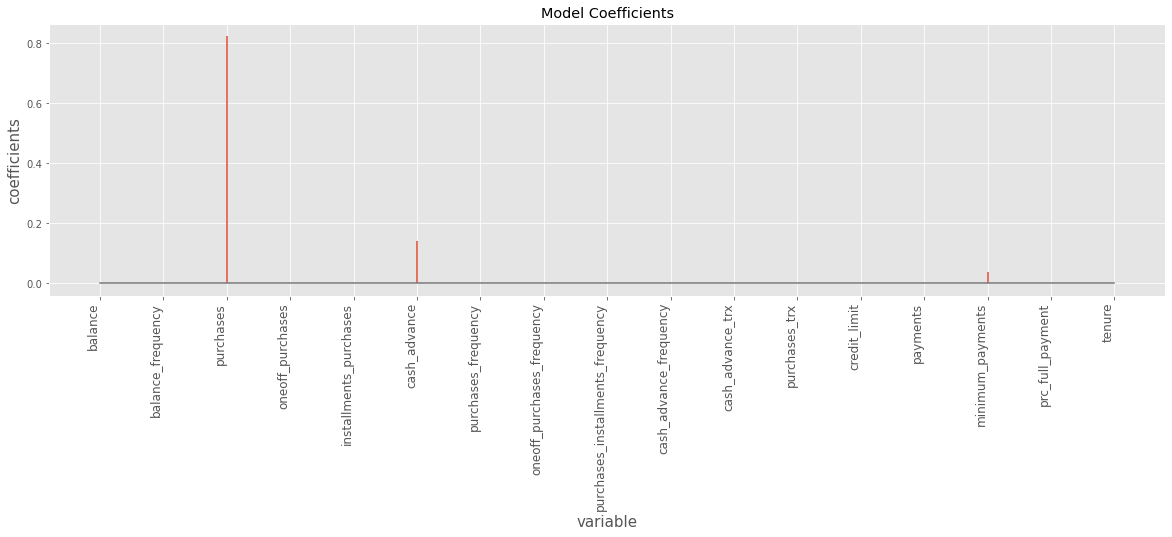

In [37]:
# Plot
fig, ax = plt.subplots(figsize=(20, 5))
ax.stem(importancia_predictores.predictor, importancia_predictores.importance, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=12)
ax.set_xlabel('variable',fontsize=15)
ax.set_ylabel('coefficients',fontsize=15)
ax.set_title('Model Coefficients');

In [38]:
# Probability predictions 

predicciones = modelo.predict_proba(X = X_test)
predicciones[:5, :]

array([[0.99678293, 0.00321707],
       [0.99678293, 0.00321707],
       [0.99678293, 0.00321707],
       [0.99678293, 0.00321707],
       [0.99678293, 0.00321707]])

The predictor "purchases", amount of purchases made from account, it turned out to be the most important predictor for the model follow by "cash_advance"

In [39]:
# Clasificación empleando la clase de mayor probabilidad

df_predicciones = pd.DataFrame(data=predicciones, columns=['1', '0'])
df_predicciones['clasificacion_default_0.5'] = np.where(df_predicciones['0'] > df_predicciones['1'], 0, 1)
df_predicciones.head(3)



1         0  clasificacion_default_0.5
0  0.996783  0.003217                          1
1  0.996783  0.003217                          1
2  0.996783  0.003217                          1

For example considering a fraud (1) and no fraud (0), if we want to know with a probability of 80% when a fraud occurred. We obtain the follow

In [40]:
# Clasificación final empleando un threshold de 0.8 para la clase 1.

df_predicciones['clasificacion_custom_0.8'] = np.where(df_predicciones['1'] > 0.8, 1, 0)
df_predicciones.iloc[5:10, :]



1         0  clasificacion_default_0.5  clasificacion_custom_0.8
5  0.996783  0.003217                          1                         1
6  0.996783  0.003217                          1                         1
7  0.996783  0.003217                          1                         1
8  0.529412  0.470588                          1                         0
9  0.996783  0.003217                          1                         1

<a id="s-15"></a>
## Conclusions

* We can conclude that in terms of correlated variables we obtained a predective model that reproduces this same appreciation, that is to say, that the variable `purchases` that we seen in the structure analysis in the correlated heatmap is the same variable that has most importance in our model.
* Our method has a accuracy of the test of 99.5%, this is validated by the narrow diference and simulitude that we can see in the plot of trainig-error and generalization-error.

<a id="s-16"></a>
## References

* Árboles de decisión con Python: regresión y clasificación by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py07_arboles_decision_python.html 
* https://www.kaggle.com/caioferreirabernardo/credit-card-fraud
* https://scikit-learn.org/stable/modules/tree
